Loading file and creating named entities per sentence.

In [23]:
import nltk
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
import operator

inputFile = "./casts.csv"
delimitor = ";"

In graph

In [40]:
# input text
lines = None
with open(inputFile, 'r') as f:
    lines = f.readlines()
    
actors = []
movie = ""
G = nx.Graph()

print(len(lines))

for line in lines:
    line = line.split(delimitor)
    if line[2][1:-1] == "s a":
        continue
    G.add_node(line[2][1:-1])
    if movie == line[1][1:-1]:
        for actor in actors:
            G.add_edge(line[2][1:-1], actor)
    else:
        actors = []
        movie = line[1][1:-1]
    
    actors.append(line[2][1:-1])
    
nx.write_gexf(G, "export.gexf")

46233


In [77]:
def extractEntities(ne_chunked):
    entities = []
    for entity in ne_chunked:
        if isinstance(entity, nltk.tree.Tree):
            text = " ".join([word for word, tag in entity.leaves()])
            entities.append(text);
        else:
            continue
    return entities

G=nx.Graph()
entityDict = {}
i = 0
#last stable sentences cnt with graphviz_layout(G, prog="fdp") 1164
for sentence in ne_sentences:
    entities = extractEntities(sentence)
    #print(entities)
    for entity in entities:
        if not(entity in entityDict):
            entityDict[entity] = i
            i = i + 1
            #G.add_node(int(entityDict[entity]))
            G.add_node(entity)
    for entity_index1 in range(len(entities)-1):
        for entity_index2 in range(entity_index1+1, len(entities)):
            #G.add_edge(entityDict[entities[entity_index1]], entityDict[entities[entity_index2]])
            G.add_edge(entities[entity_index1], entities[entity_index2])

#print(G.edges())
#pos = graphviz_layout(G, prog="fdp")

 
# write to GEXF
nx.write_gexf(G, "export.gexf")

Statistics

In [41]:
print("Number of nodes: " + str(G.number_of_nodes()))
print("Number of edges: " + str(G.number_of_edges()))
print("density: " +str(nx.density(G)))

print("Centralities:")

deg = sorted(nx.degree_centrality(G).items(), key=operator.itemgetter(1), reverse=True)
clo = sorted(nx.closeness_centrality(G).items(), key=operator.itemgetter(1), reverse=True)
bet = sorted(nx.betweenness_centrality(G).items(), key=operator.itemgetter(1), reverse=True)
eig = sorted(nx.eigenvector_centrality(G, 1000).items(), key=operator.itemgetter(1), reverse=True)

print("Degree: ")
for elem in deg[:10]:
    print(elem)
print("\nCloseness: ")
for elem in clo[:10]:
    print(elem)
print("\nBetweenness: ")
for elem in bet[:10]:
    print(elem)
print("\nEigenvector: ")
for elem in eig[:10]:
    print(elem)
print()
 
print("Components:")
components = nx.connected_components(G)
        
print("Communities:")
communities = {node:cid+1 for cid,community in enumerate(nx.k_clique_communities(G,3)) for node in community}

Number of nodes: 16615
Number of edges: 132233
density: 0.0009580657061085827
Centralities:


KeyboardInterrupt: 

Visualisations

/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


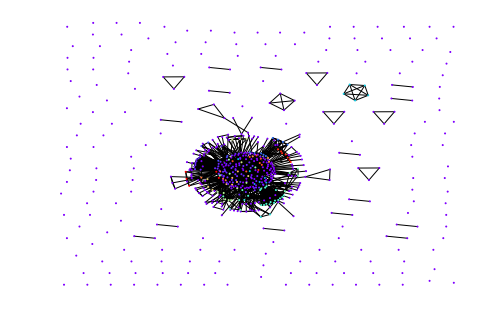

In [114]:
communities = {node:cid+1 for cid,community in enumerate(nx.k_clique_communities(G,5)) for node in community}

plt.clf()
pos = graphviz_layout(G)
nx.draw(G, pos,
        node_size = 1,
        #labels={v:str(v) for v in G},
        cmap = plt.get_cmap("rainbow"),
        node_color=[communities[v] if v in communities else 0 for v in G])
plt.savefig("communities.pdf")
plt.show()
